# Thông tin sinh viên
* Họ tên: Mai Duy Nam
* MSSV: 19120298

# Import thư viện

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid', palette='colorblind')
pd.options.display.float_format = '{:,.2f}'.format

Giải nén file `data.csv.zip` nếu chưa có file `data.csv`.

In [2]:
!test ! -f data.csv && unzip data.csv.zip

# Nạp dữ liệu

In [3]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [4]:
features_df = pd.read_csv('featuresdf.csv')
features_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.82,0.65,1.00,-3.18,0.00,0.08,0.58,0.00,0.09,0.93,95.98,"233,713.00",4.00
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.69,0.81,2.00,-4.33,1.00,0.12,0.23,0.00,0.09,0.81,88.93,"228,827.00",4.00
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.66,0.79,2.00,-4.76,1.00,0.17,0.21,0.00,0.11,0.85,177.83,"228,200.00",4.00
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.62,0.64,11.00,-6.77,0.00,0.03,0.05,0.00,0.16,0.45,103.02,"247,160.00",4.00
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.61,0.67,7.00,-4.28,1.00,0.04,0.06,0.00,0.17,0.81,80.92,"288,600.00",4.00


# Tiền xử lý

## `data_df`

In [5]:
data_df.shape

(3441197, 7)

In [6]:
data_df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

Kiểm tra và loại bỏ các cột chứa giá trị thiếu.

In [7]:
data_df.isna().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [8]:
data_df.dropna(inplace=True)

Kiểm tra kiểu dữ liệu của các cột.

In [9]:
data_df.dtypes

Position       int64
Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
Region        object
dtype: object

Chuyển kiểu dữ liệu của cột `Date` từ dạng `string` về `datetime`.

In [10]:
data_df['Date'] = pd.to_datetime(data_df['Date'])

Kiểm tra phân bố giá trị của các cột số.

In [11]:
data_df.describe()

,Position,Streams
count,"3,440,540.00","3,440,540.00"
mean,94.65,"51,884.52"
std,57.39,"201,773.32"
min,1.00,"1,001.00"
25%,45.00,"3,321.00"
50%,92.00,"9,226.00"
75%,143.00,"29,656.00"
max,200.00,"11,381,520.00"


## `features_df`

In [12]:
features_df.shape

(100, 16)

In [13]:
features_df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [14]:
features_df.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [15]:
features_df.dtypes

id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [16]:
features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,0.70,0.66,5.57,-5.65,0.58,0.10,0.17,0.00,0.15,0.52,119.20,"218,387.28",3.99
std,0.13,0.14,3.73,1.80,0.50,0.10,0.17,0.03,0.08,0.22,27.95,"32,851.08",0.10
min,0.26,0.35,0.00,-11.46,0.00,0.02,0.00,0.00,0.04,0.09,75.02,"165,387.00",3.00
25%,0.64,0.56,2.00,-6.59,0.00,0.04,0.04,0.00,0.10,0.38,99.91,"198,490.50",4.00
50%,0.71,0.67,6.00,-5.44,1.00,0.06,0.11,0.00,0.12,0.50,112.47,"214,106.00",4.00
75%,0.77,0.79,9.00,-4.33,1.00,0.12,0.23,0.00,0.18,0.68,137.17,"230,543.00",4.00
max,0.93,0.93,11.00,-2.40,1.00,0.43,0.69,0.21,0.44,0.97,199.86,"343,150.00",4.00


# Phân tích và trực quan hóa

## Bài 1: Biểu đồ danh sách các nghệ sĩ có từ 2 bài hát đạt top

In [17]:
# artist_top_count_df = data_df[(data_df['Position'] >= 1) & (data_df['Position'] <= 100)]\

# Ở đây hiểu các bài hát đạt top là các bài hát được xuất hiện trong data_df
artist_top_count_df = data_df\
                      .groupby('Artist')['Track Name']\
                      .nunique()\
                      .to_frame()\
                      .reset_index()

# Đổi tên cột Track Name
artist_top_count_df.rename(
    columns={'Track Name': 'Top Track Count'},
    inplace=True
)

artist_top_count_df = artist_top_count_df[artist_top_count_df['Top Track Count'] >= 2]\
                      .sort_values(by='Top Track Count', ascending=False)
artist_top_count_df.head()

,Artist,Top Track Count
2859,Jul,73
1627,Ed Sheeran,60
3413,Linkin Park,59
1163,Coldplay,56
3865,Mayday,53


Top 30 nghệ sĩ có số bài hát đạt top nhiều nhất.

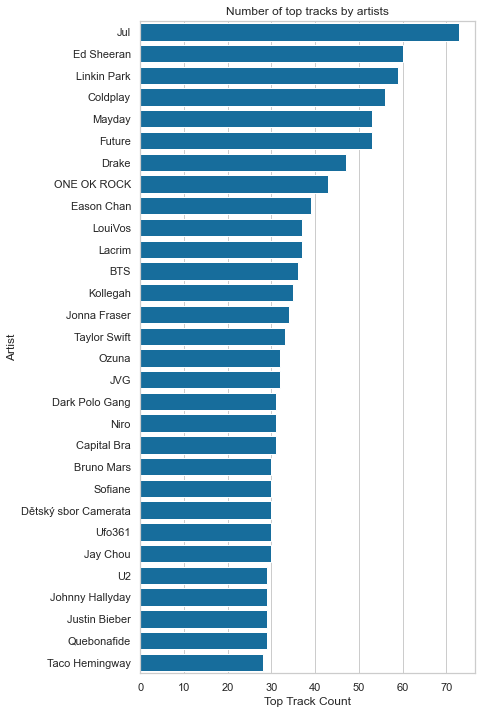

In [18]:
fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(y='Artist', x='Top Track Count', data=artist_top_count_df[:30], ax=ax, color='b', orient='h')
ax.set_title('Number of top tracks by artists')
plt.show()

## Bài 2: Tìm số lần các bài hát của Ed Sheeran nằm trong top 100 ở bảng xếp hạng Mỹ

Biến `ed_us_top_songs` chứa các bài hát của Ed Sheeran đã từng lọt vào top 100 bảng xếp hạng Mỹ.

In [19]:
ed_us_top_songs = data_df[(data_df['Artist'] == 'Ed Sheeran') &\
                          (data_df['Region'] == 'us') &\
                          (data_df['Position'] >= 1) & (data_df['Position'] <= 100)]

ed_us_top_songs.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
772622,1,Shape of You,Ed Sheeran,1517787,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,us
772623,2,Castle on the Hill,Ed Sheeran,1472037,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-01-06,us
772711,90,Photograph,Ed Sheeran,240747,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-01-06,us
772721,100,Thinking Out Loud,Ed Sheeran,225907,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-01-06,us
772822,1,Shape of You,Ed Sheeran,1437473,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,us


Tìm số lần các bài hát đạt top bằng cách đếm theo ngày.

In [20]:
ed_us_top_songs_count = ed_us_top_songs.groupby('Track Name')['Date'].count().sort_values(ascending=False)
ed_us_top_songs_count

Track Name
Shape of You                           364
Perfect                                148
Castle on the Hill                     104
Galway Girl                             62
Perfect Duet (Ed Sheeran & Beyoncé)     39
Happier                                 35
Dive                                    31
New Man                                 22
How Would You Feel (Paean)              20
What Do I Know?                         19
Supermarket Flowers                     17
Barcelona                               17
Nancy Mulligan                          16
Hearts Don't Break Around Here          15
Bibia Be Ye Ye                          14
Save Myself                             14
Eraser                                  14
Thinking Out Loud                        6
Photograph                               5
Name: Date, dtype: int64

## Bài 3: Vẽ biểu đồ diễn biến bảng xếp hạng của bài Shape of You của tác giả Ed Sheeran trong top 100 ở Mỹ. Mở rộng: diễn biến các bài hát của Ed Sheeran trong top 100 ở Mỹ.

### Diễn biến bảng xếp hạng của bài hát Shape of You

In [21]:
soy = ed_us_top_songs[ed_us_top_songs['Track Name'] == 'Shape of You']
soy_rank_progress = soy[['Date', 'Position']].sort_values(by='Date')
soy_rank_progress.head()

,Date,Position
772622,2017-01-06,1
772822,2017-01-07,1
773022,2017-01-08,1
773222,2017-01-09,1
773423,2017-01-10,2


Biểu đồ dưới đây thể hiện diễn biến trong bảng xếp hạng Mỹ của bài hát Shape of You. Lưu ý, vì bài hát với vị trí cao lại tương ưng với giá trị `Position` thấp, do đó ta lật trục tung ngược lại sao cho giá trị thấp (từ 0) nằm ở vị trí cao.

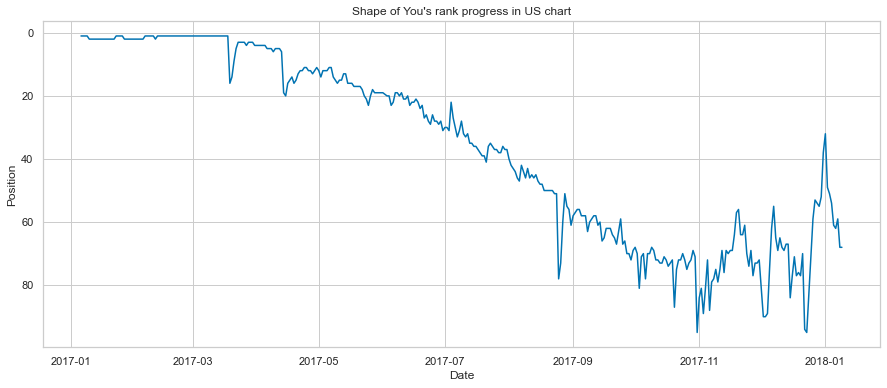

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=soy_rank_progress, x='Date', y='Position', ax=ax)

ax.invert_yaxis()
ax.set_xlabel('Date')
ax.set_ylabel('Position')
ax.set_title('Shape of You\'s rank progress in US chart')
plt.show()

### Diễn biến bảng xếp hạng của các bài hát của Ed Sheeran

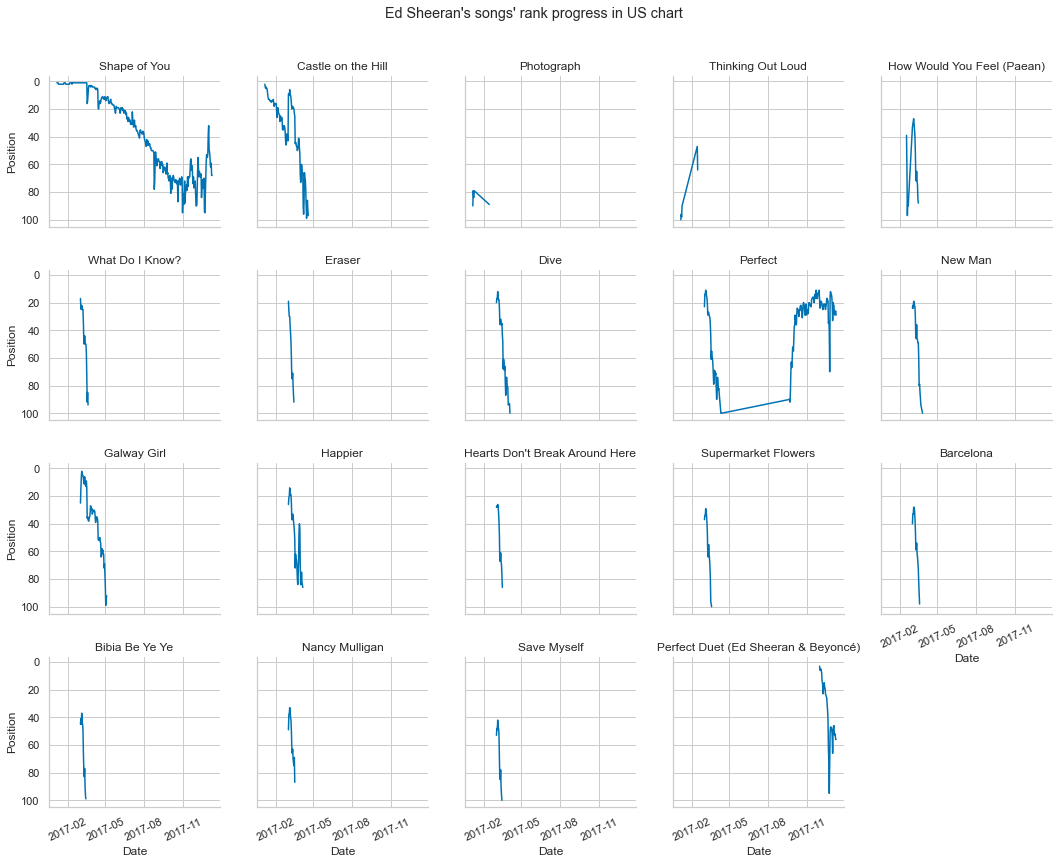

In [23]:
g = sns.FacetGrid(data=ed_us_top_songs[['Date', 'Position', 'Track Name']], col='Track Name', col_wrap=5)
g.map(sns.lineplot, 'Date', 'Position')


plt.gca().invert_yaxis()
for ax in g.axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    for xticklabel in ax.get_xticklabels():
        xticklabel.set_rotation(25)
        
g.set_titles(col_template='{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ed Sheeran\'s songs\' rank progress in US chart')
plt.show()